In [ ]:
# Author: Shiqi Jiang
# Last modified: 11/08/2021

In [ ]:
# This file attempts to generate random data points from a theoretical Gamma, compute their Nearest Neighbour Distributions,
# and to compare them with the empirical one(with outliers) to find the closest one. Then use the parameters of this Gamma to model
# the empirical data.


In [1]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

In [2]:
# Local file of datasets. Use AT only here
# IGNORE THIS
data_location_AT = [r"D:\file\2021fall\Research\P-value\data\ATER",
                 r"D:\file\2021fall\Research\P-value\data\ATERDD",
                 r"D:\file\2021fall\Research\P-value\data\ATGEO",
                 r"D:\file\2021fall\Research\P-value\data\ATGEOGD",
                 r"D:\file\2021fall\Research\P-value\data\ATHGG",
                 r"D:\file\2021fall\Research\P-value\data\ATSF",
                 r"D:\file\2021fall\Research\P-value\data\ATSFDD",
                 r"D:\file\2021fall\Research\P-value\data\ATSticky",
                 r"D:\file\2021fall\Research\P-value\data\ATOriginal"]

In [3]:
cat = ['ER','ERDD','GEO','GEOGD','HGG','SF','SFDD','Sticky']    # for future use

ER = np.genfromtxt('/Users/jiang/Documents/Research/data/ATER')     # Generating array for real data from file.  ER has 499 data points 

In [4]:
# generating random sample points from theoretical gamma
def gamma_points(num,shape=None,scale=None,location=0,random=True):
    """
    num: # of points generated
    shape, scale: need to be specified if random is False, generating a fixed-value gamma
    random: default=True: generating <num> random points from a gamma with random shape and scale.
    Return the paramters of the gamma, the Gamma object itself, and the a Sorted List of randomly generated points
    """
    if random:
        r = np.random.rand(1,3)
        shape,scale,location = r[0][0]*5,r[0][1]*20, r[0][2]*5    # generating random parameters. To be refined.
    print("Shape: {}, Scale: {}".format(shape,scale))
    Gamma = gamma(a=shape,scale=scale,loc=location)
    s = Gamma.rvs(num)
    s = s.tolist()
    s.sort()
    return shape,scale,Gamma, s

In [5]:
# computing nearest neighbour distance for sample data points(only 1d considered)
def nearest_distance(L):
    """
    L: should be a Sorted List of data points
    Return an Array of Nearest Neighbour Distances
    """
    d = []
    for i in range(len(L)):
        if i == 0:
            d.append(abs(L[i+1]-L[i]))
        elif i == len(L)-1:
            d.append(abs(L[i]-L[i-1]))
        else:
            d.append(min(abs(L[i]-L[i-1]),abs(L[i+1]-L[i])))
    return np.array(d)
            

In [154]:
# use gamma for imported methods and Gamma for local variables
# plot theoretical gamma pdf, sample points hist, and NN hist
def plot(shape,scale,Gamma, points, distance, data_distance,Distance=False):
    """
    points: Sorted List of randomly generated points
    distance: NN of those ^^ points
    """
    x = np.linspace(Gamma.ppf(0.01), Gamma.ppf(0.99), 100)
    f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20,15))
    #ax[0].plot(x, Gamma.pdf(x))
    #ax[0].set_title('Gamma PDF')
    
    #ax[1].hist(points,bins=100,edgecolor='white')
    #ax[1].set_title('Gamma Random Points')
    
    distance_nooutlier = [i for i in distance if i <= 6e7]
    print("outliers discraded: ",len(distance)- len(distance_nooutlier))
    if Distance:
        ax.hist(distance_nooutlier, bins=100, alpha=0.8,edgecolor='white')
        ax.hist(data_distance, bins=100, alpha=0.5,edgecolor='white')
        ax.set_title('Nearest Distance')
        ax.set_xticks(range(0,60000000,1000000))
    plt.show()


In [7]:
# calculating real data's shortest(NN) distance 
# real data is high-dimensional data points
def data_distance(data):
    shortest_distance = [0]*len(data)
    for i in range(len(data)):
        x = np.delete(data,i,0)
        d = np.sqrt(np.sum((x-data[i])**2))
        shortest_distance[i] = d.min()
    
    return np.array(shortest_distance)   # return an array of real data's NN distance

# plotting real data's NN hist
def plot_data_distance(D):
    """
    D: an array of real data' NN distance
    """
    f, ax = plt.subplots(1,1, figsize = (8,6))
    ax.hist(D,edgecolor='white',bins=50)   ## consider specifying <bins>
    plt.show()
    return

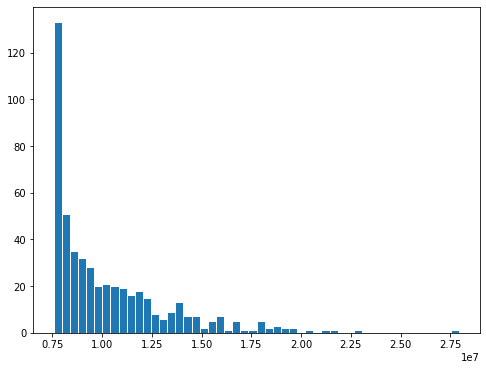

In [8]:
# plot real data's NN distance
real_data_distance = data_distance(ER)
plot_data_distance(real_data_distance)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,11,5,False)
sample_NN = nearest_distance(sample)
plot(shape,scale,Gamma, sample, sample_NN, True)

In [ ]:
# A random Gamma with random parameters
# running this cell will have different result every time
shape,scale,Gamma,sample= gamma_points(499)
sample_NN = nearest_distance(sample)
plot(shape,scale,Gamma, sample, sample_NN, True)

### 11.13 Manually find appropriate Gamma

In [ ]:
#plot real data
real_data_distance = data_distance(ER)
print(max(real_data_distance))
plot_data_distance(real_data_distance)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,11,5,0,False)
sample_NN = nearest_distance(sample)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN, True)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,15,5e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,15,5e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,12,7e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,10,7e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,11,e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,11.5,5e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,11.5,5e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,11.5,5e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

In [ ]:
# A theoretical Gamma with fixed parameters
shape,scale,Gamma,sample= gamma_points(499,11.5,5e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

### same parameters, still depends on different samplings
### not enough complexity to model the emirical data?

!!!!!
Shape: 32, Scale: 20000000.0
7561299.601992339 530.824955701828
155202061.26463938
outliers discraded:  2


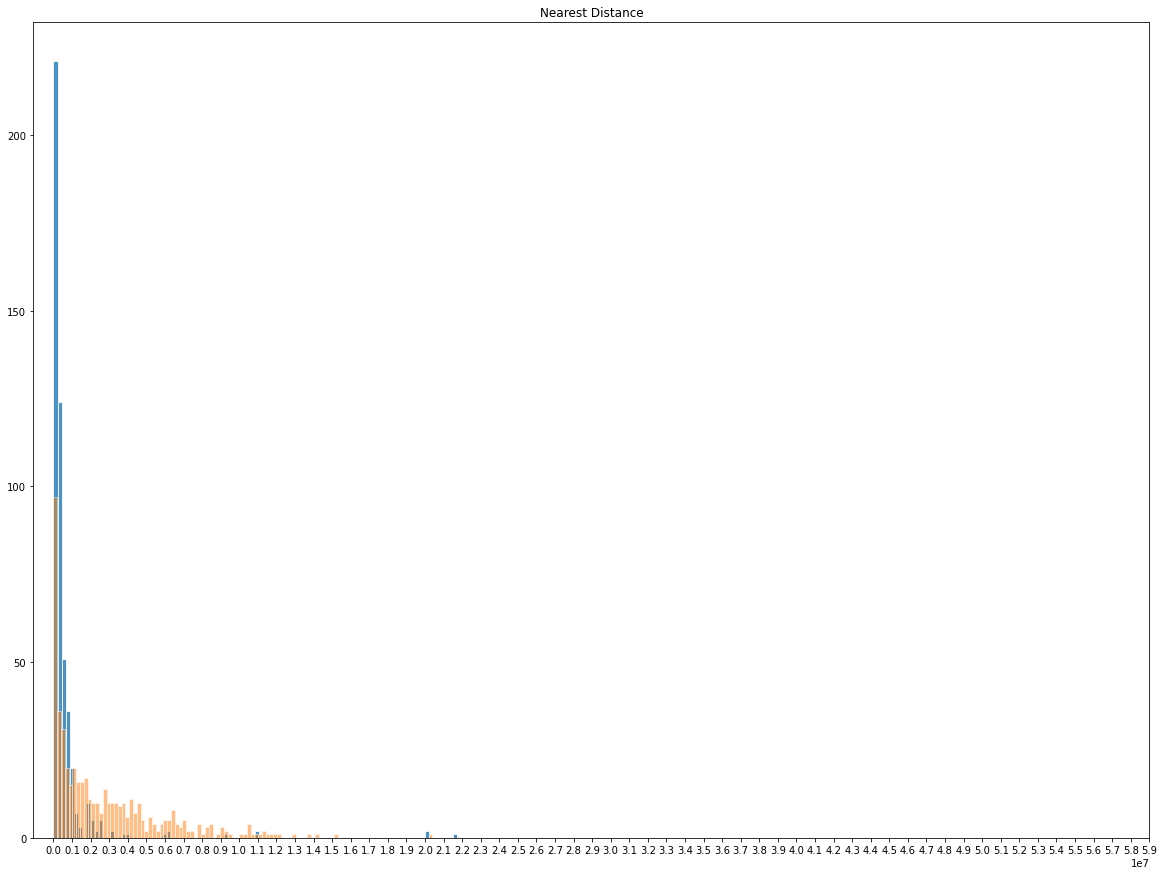

In [155]:
# A theoretical Gamma with fixed parameters
print("!!!!!")
#starting parameters = 11,5e10
shape,scale,Gamma,sample= gamma_points(499,32,2e7,random=False)
sample_NN = nearest_distance(sample)
min_r = min(real_data_distance)
min_s = min(sample_NN)
print(min_r,min_s)
print(max(sample_NN))
plot(shape,scale,Gamma, sample, sample_NN,real_data_distance-(min_r-min_s), True)

In [104]:
sum(real_data_distance-(min_r-min_s))

1343265959.2910979